# Analysis on accuracy

In [4]:
%run ../python/OscilloscopeGUI/script/dataset.py

from keras import layers
from keras import models

DATASET_FOLDER = "../python/OscilloscopeGUI/dataset/Y2019/data_environment/"
SAVED_MODEL = DATASET_FOLDER + "my_life_environment_cnn_20230923152317.h5"

In [5]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False, shuffle=False)['mfsc']

model = models.load_model(SAVED_MODEL)
ds.class_labels

['silence',
 'train',
 'station',
 'fastfood',
 'escalator',
 'mall',
 'ship',
 'mall2']

In [6]:
train_data, train_labels = ds.reshape_per_class(train_data, train_labels)

'station'

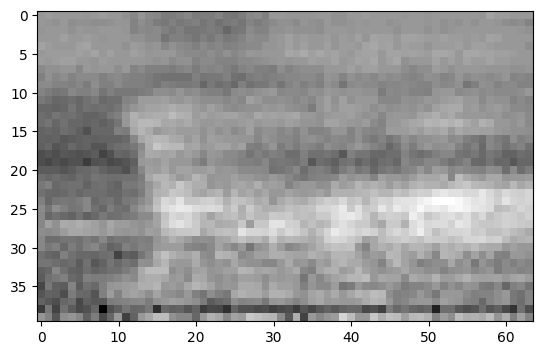

In [7]:
l = ds.class_labels.index('station')
image_number = 30

plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')
ds.class_labels[np.argmax(train_labels[l, image_number])]

In [8]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[l])

5/5 [==============================] - 0s 11ms/step


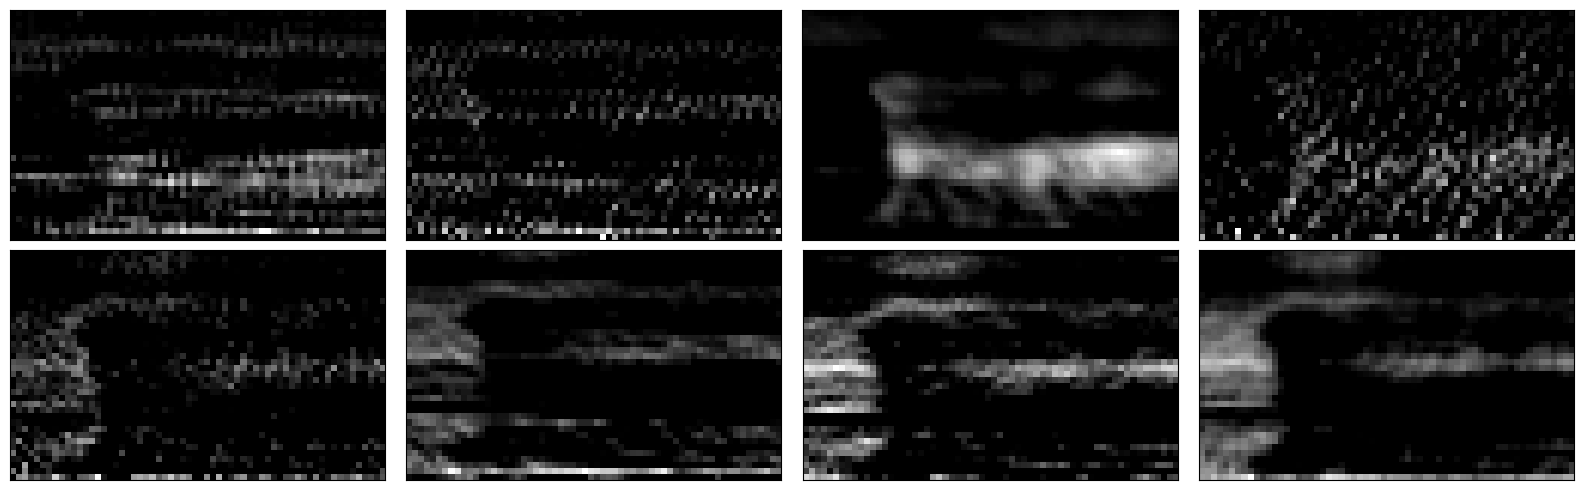

In [9]:
plot_layer(activations, image_number, 0, 4)

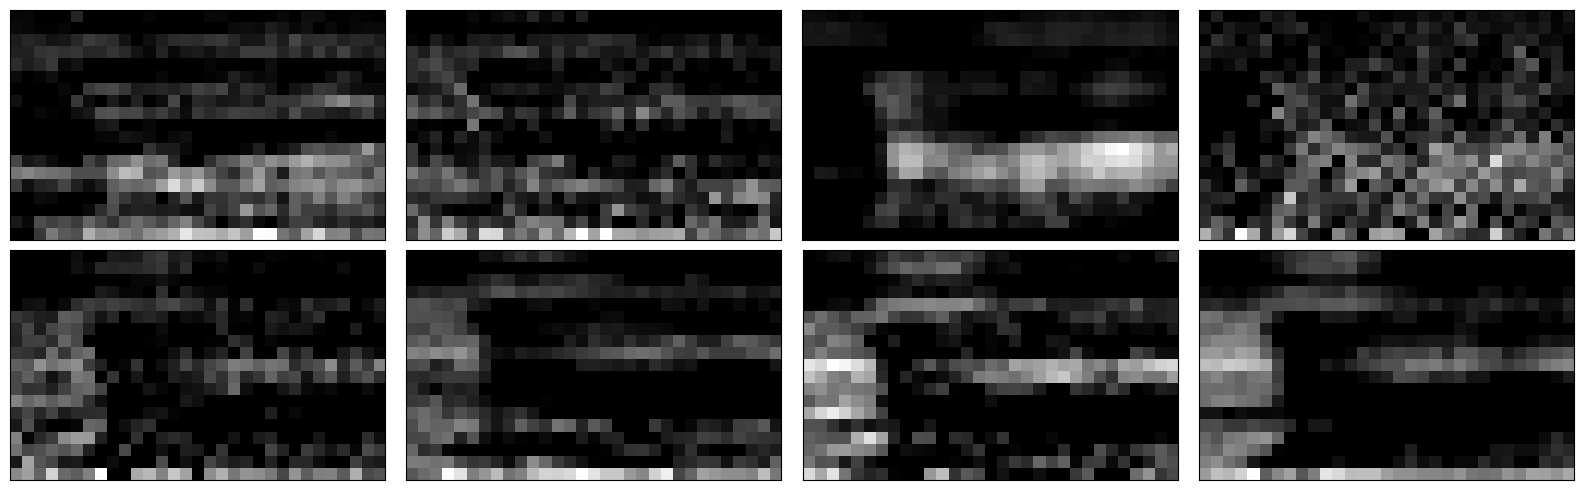

In [10]:
plot_layer(activations, image_number, 1, 4)

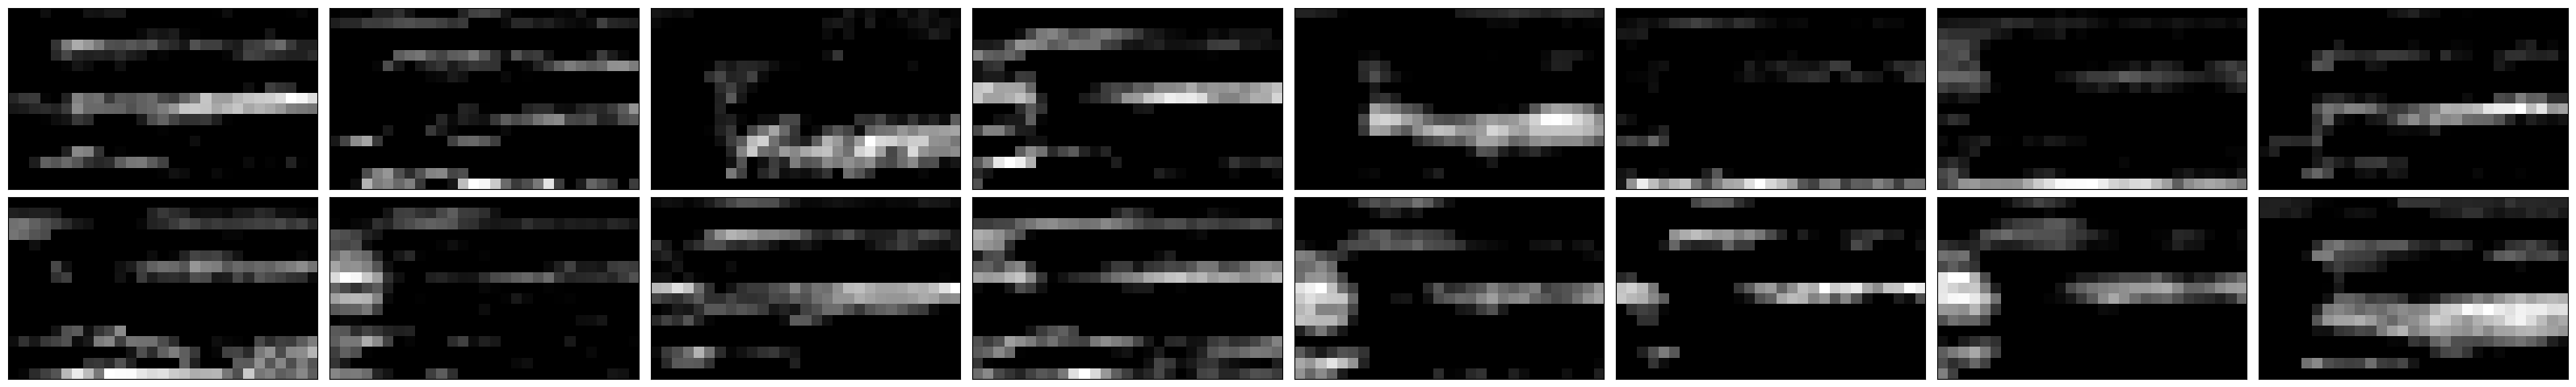

In [11]:
plot_layer(activations, image_number, 3, 8)

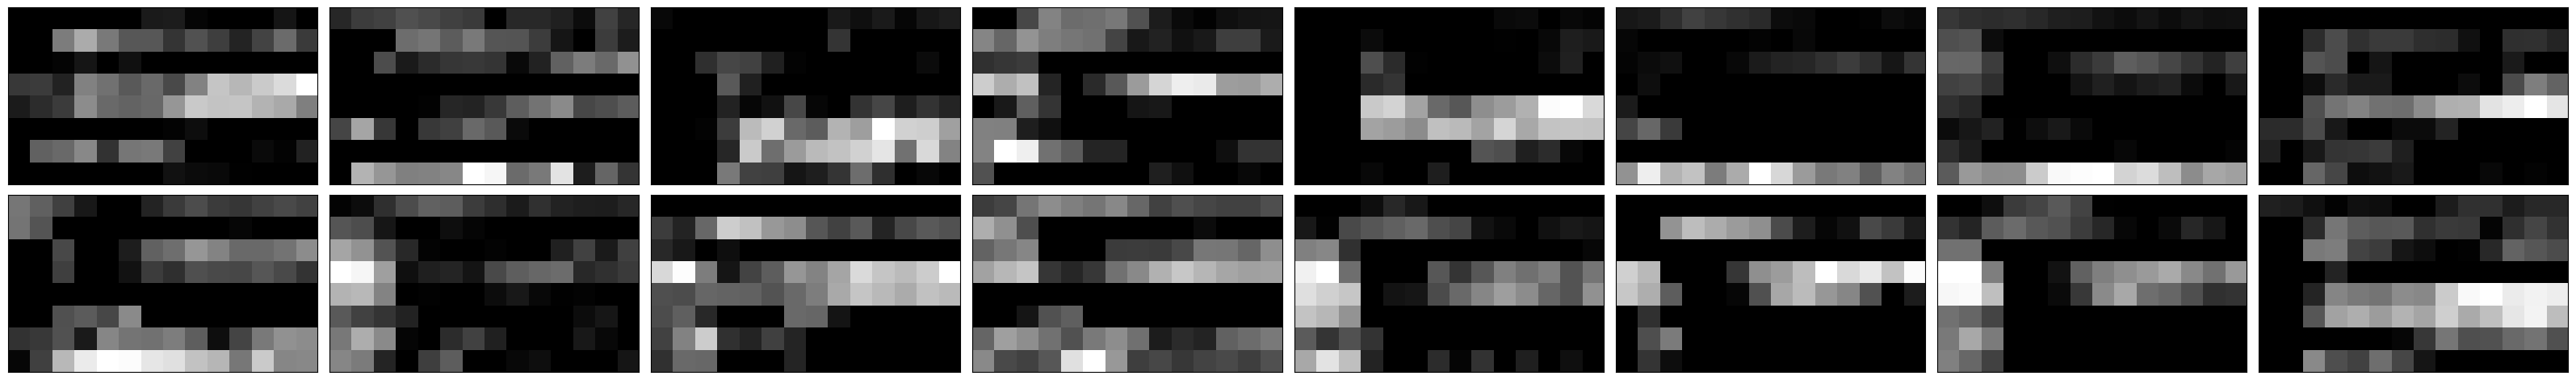

In [12]:
plot_layer(activations, image_number, 4, 8)

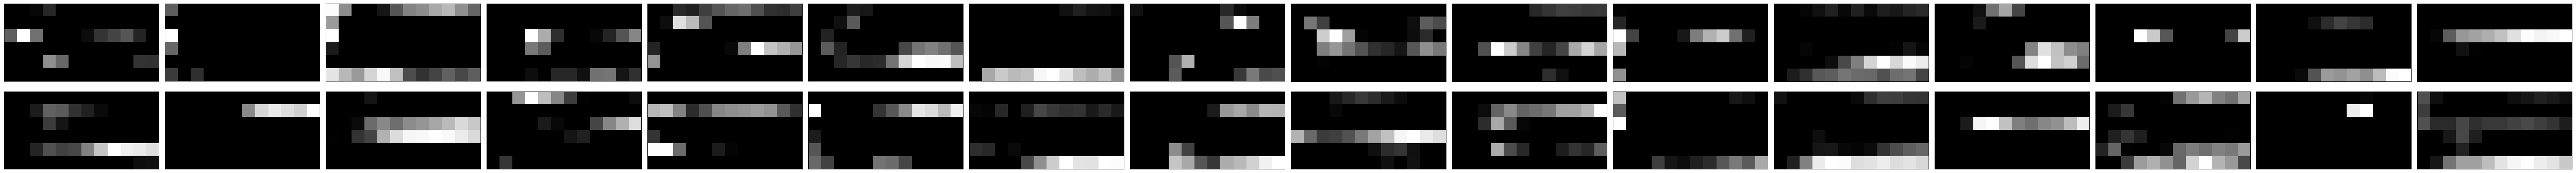

In [13]:
plot_layer(activations, image_number, 6, 16)

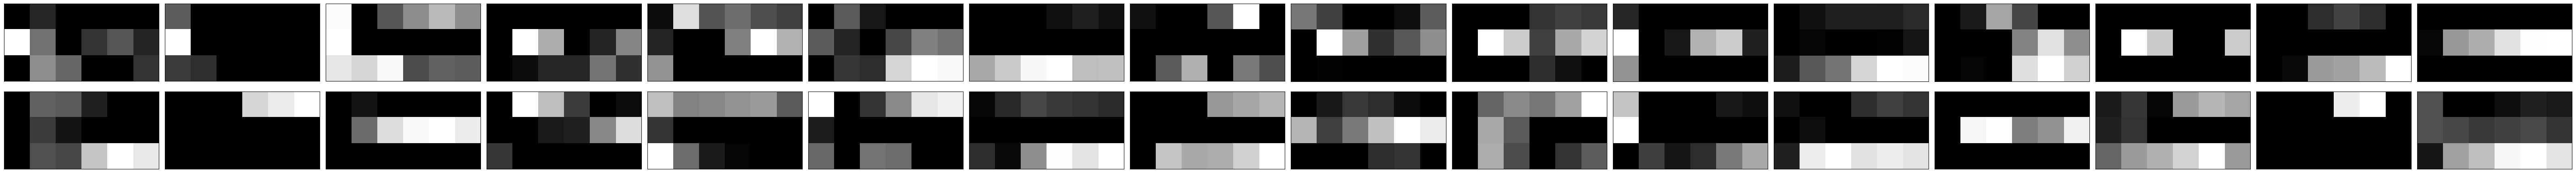

In [14]:
plot_layer(activations, image_number, 7, 16)

In [15]:
inference = (activations[-1]*100).astype(int)
index = np.array([np.argmax(l) for l in inference], dtype=int)
index

array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
error = np.where(index != l)
error

(array([ 3, 23, 29, 40, 46, 65, 74, 81, 92], dtype=int64),)

In [17]:
image_number = 117
ds.class_labels[index[image_number]]

'station'

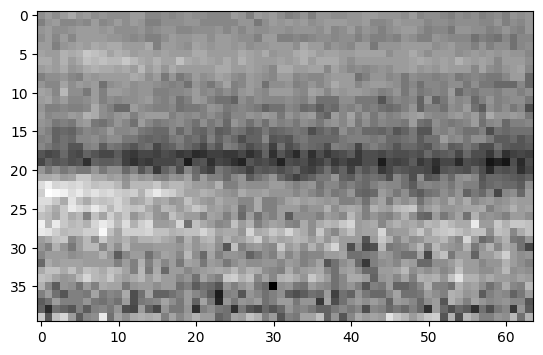

In [18]:
plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')